In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
enc = OrdinalEncoder()
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, SVC


import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


except ERA every other column is Int 

In [5]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There is no Null Values present in the database hence we can move a head

In [6]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Data looks fine and there is no discrepancies present in the data

In [7]:
x = df.drop(['W'],axis=1)
y = df['W']

In [10]:
df.shape

(30, 17)

17 Columns are present in the data including Output/Label

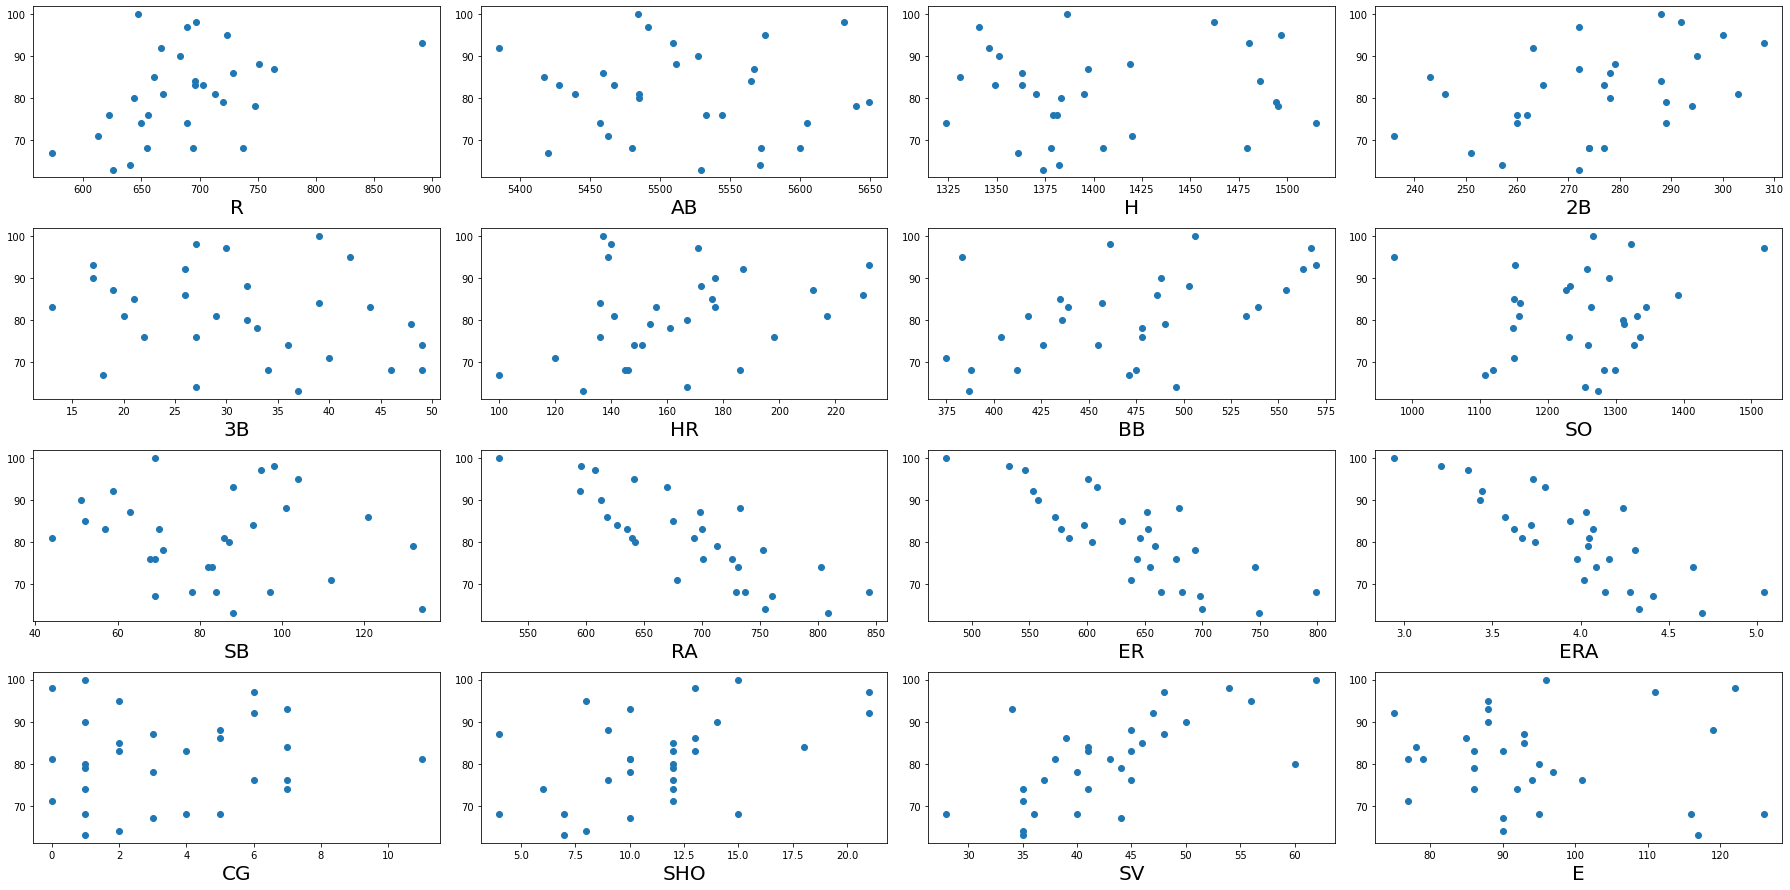

In [11]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 20:
        ax = plt.subplot(5,4,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

BB, RA, ER, ERA, SV and E columns has comparatively good relationship with Label

In [12]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Column R and E has some skewness

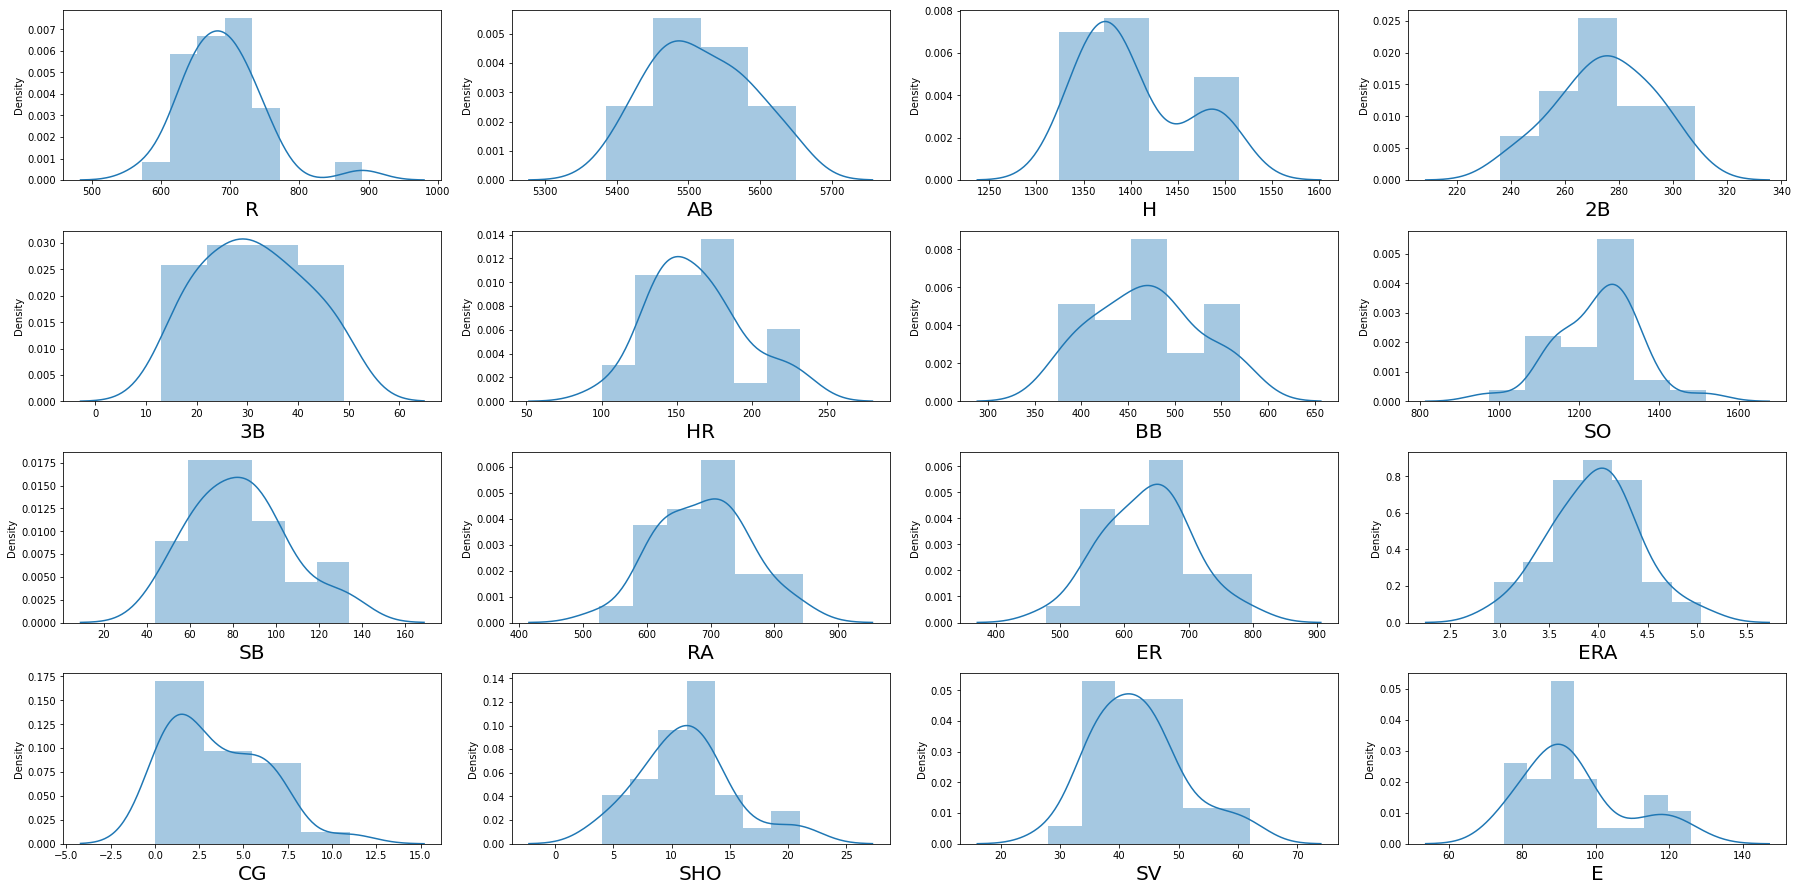

In [13]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 20:
        ax = plt.subplot(5,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Column R and E has more Skewness and column CG and H has less skewness

In [14]:
df.drop('W',axis=1).corrwith(df.W)

R      0.430751
AB    -0.087947
H      0.037612
2B     0.427797
3B    -0.251118
HR     0.307407
BB     0.484342
SO     0.111850
SB    -0.157234
RA    -0.812952
ER    -0.809435
ERA   -0.819600
CG     0.080533
SHO    0.471805
SV     0.666530
E     -0.089485
dtype: float64

E, CG, H and AB has less Co-relation with Label

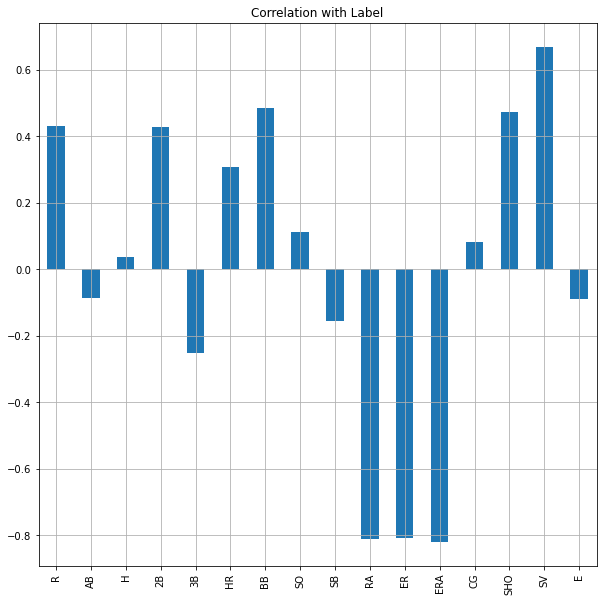

In [15]:
df.drop('W',axis=1).corrwith(df.W).plot(kind='bar',grid=True,figsize=(10,10),
                                                     title="Correlation with Label")
plt.show()

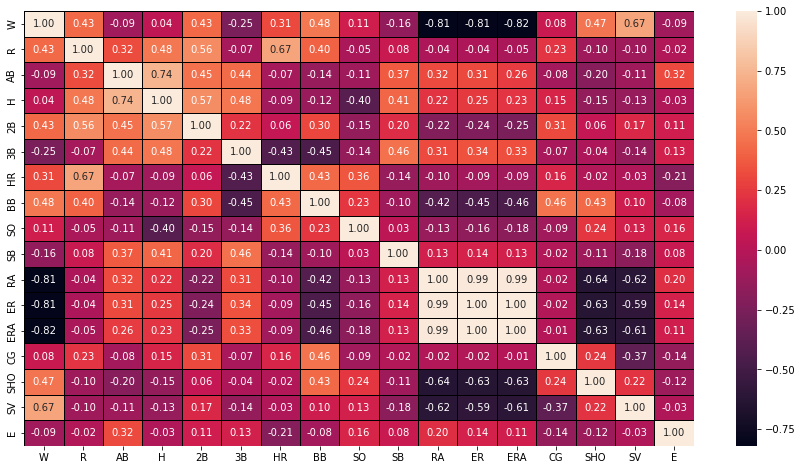

In [16]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

Multicollinearity problem exist in this database

- Multicollinearity problem exist between ERA and ER
- Multicollinearity problem exist between ERA, ER and RA


In [17]:
x = df[['RA','ER']]
y = df['ERA']

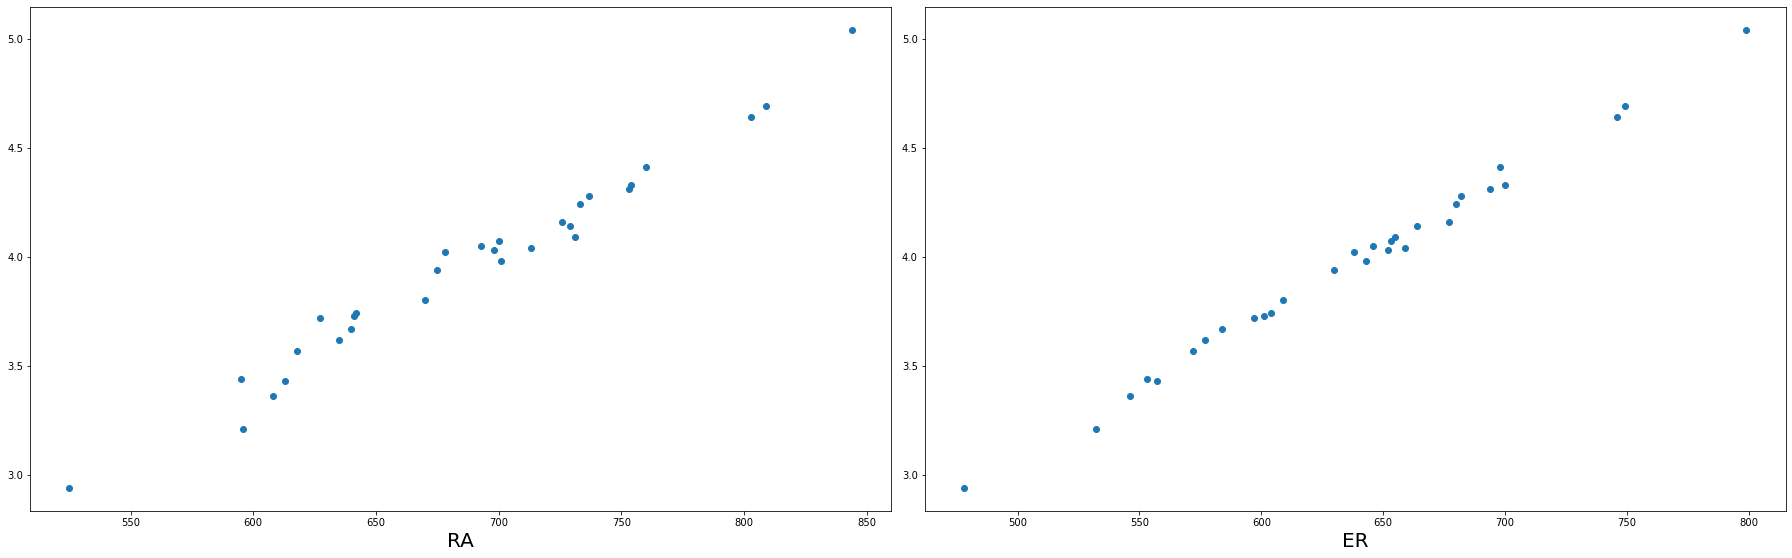

In [18]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 4:
        ax = plt.subplot(2,2,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Multicollinearity problem exist in ERA, ER and RA

- The Multicollinearity problem exist between Total bags and Small Bags

In [19]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [20]:
x = df[['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']]

In [21]:
vif = pd.DataFrame()
vif["Features"] = x.columns

In [22]:
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

In [23]:
vif

,Features,VIF
0,R,1638.985029
1,AB,4277.157018
2,H,4698.798408
3,2B,904.439835
4,3B,32.435486
5,HR,285.773237
6,BB,269.485018
7,SO,398.234104
8,SB,28.654970
9,RA,17204.829356


- between ERA, ER and RA - removing ER and ERA since it has high VIF

In [24]:
df = df.drop(['ER','ERA'],axis=1)

- Removed ER and ERA columns since they have Multicollinearity problem

In [25]:
df = df.drop(['AB','H'],axis=1)

Removed AB and H since they have less co-relation with label and high VIF

In [26]:
df.head()

,W,R,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,95,724,300,42,139,383,973,104,641,2,8,56,88
1,83,696,277,44,156,439,1264,70,700,2,12,45,86
2,81,669,303,29,141,533,1157,86,640,11,10,38,79
3,76,622,260,27,136,404,1231,68,701,7,9,37,101
4,74,689,289,49,151,455,1259,83,803,7,12,35,86


In [27]:
df.describe()

,W,R,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,11.000000,21.000000,62.000000,126.000000


Database is ready to remove outliers if exist 

In [28]:
df.shape

(30, 13)

In [29]:
x = df.drop(['W'],axis=1)
y = df['W']

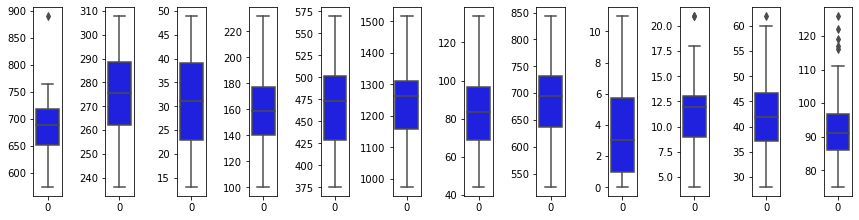

In [30]:
a = x.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

Outliers are present in 'R', 'SHO', 'SV' and 'E'

In [33]:
old_data = (df.shape)[0]

In [34]:
q1 = df['R'].quantile(0.25)
q3 = df['R'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['R'] > (q3+1.5*iqr))
lower = np.where(df['R'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from R column

In [35]:
q1 = df['SHO'].quantile(0.25)
q3 = df['SHO'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['SHO'] > (q3+1.5*iqr))
lower = np.where(df['SHO'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from SHO column

In [36]:
q1 = df['SV'].quantile(0.25)
q3 = df['SV'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['SV'] > (q3+1.5*iqr))
lower = np.where(df['SV'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from SV column

In [37]:
q1 = df['E'].quantile(0.25)
q3 = df['E'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['E'] > (q3+1.5*iqr))
lower = np.where(df['E'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from E column

In [38]:
new_data = (df.shape)[0]

In [39]:
data_loss = old_data - new_data
print('Lost', data_loss,'no. of Data')

Lost 10 no. of Data


In [40]:
x = df.drop(['W'],axis=1)
y = df['W']

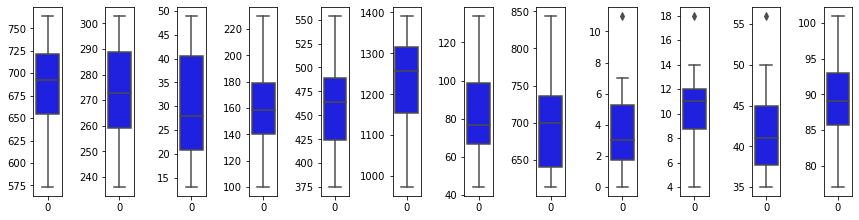

In [41]:
a = x.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

Removed Outliers that are not allowed above and below the specified limit

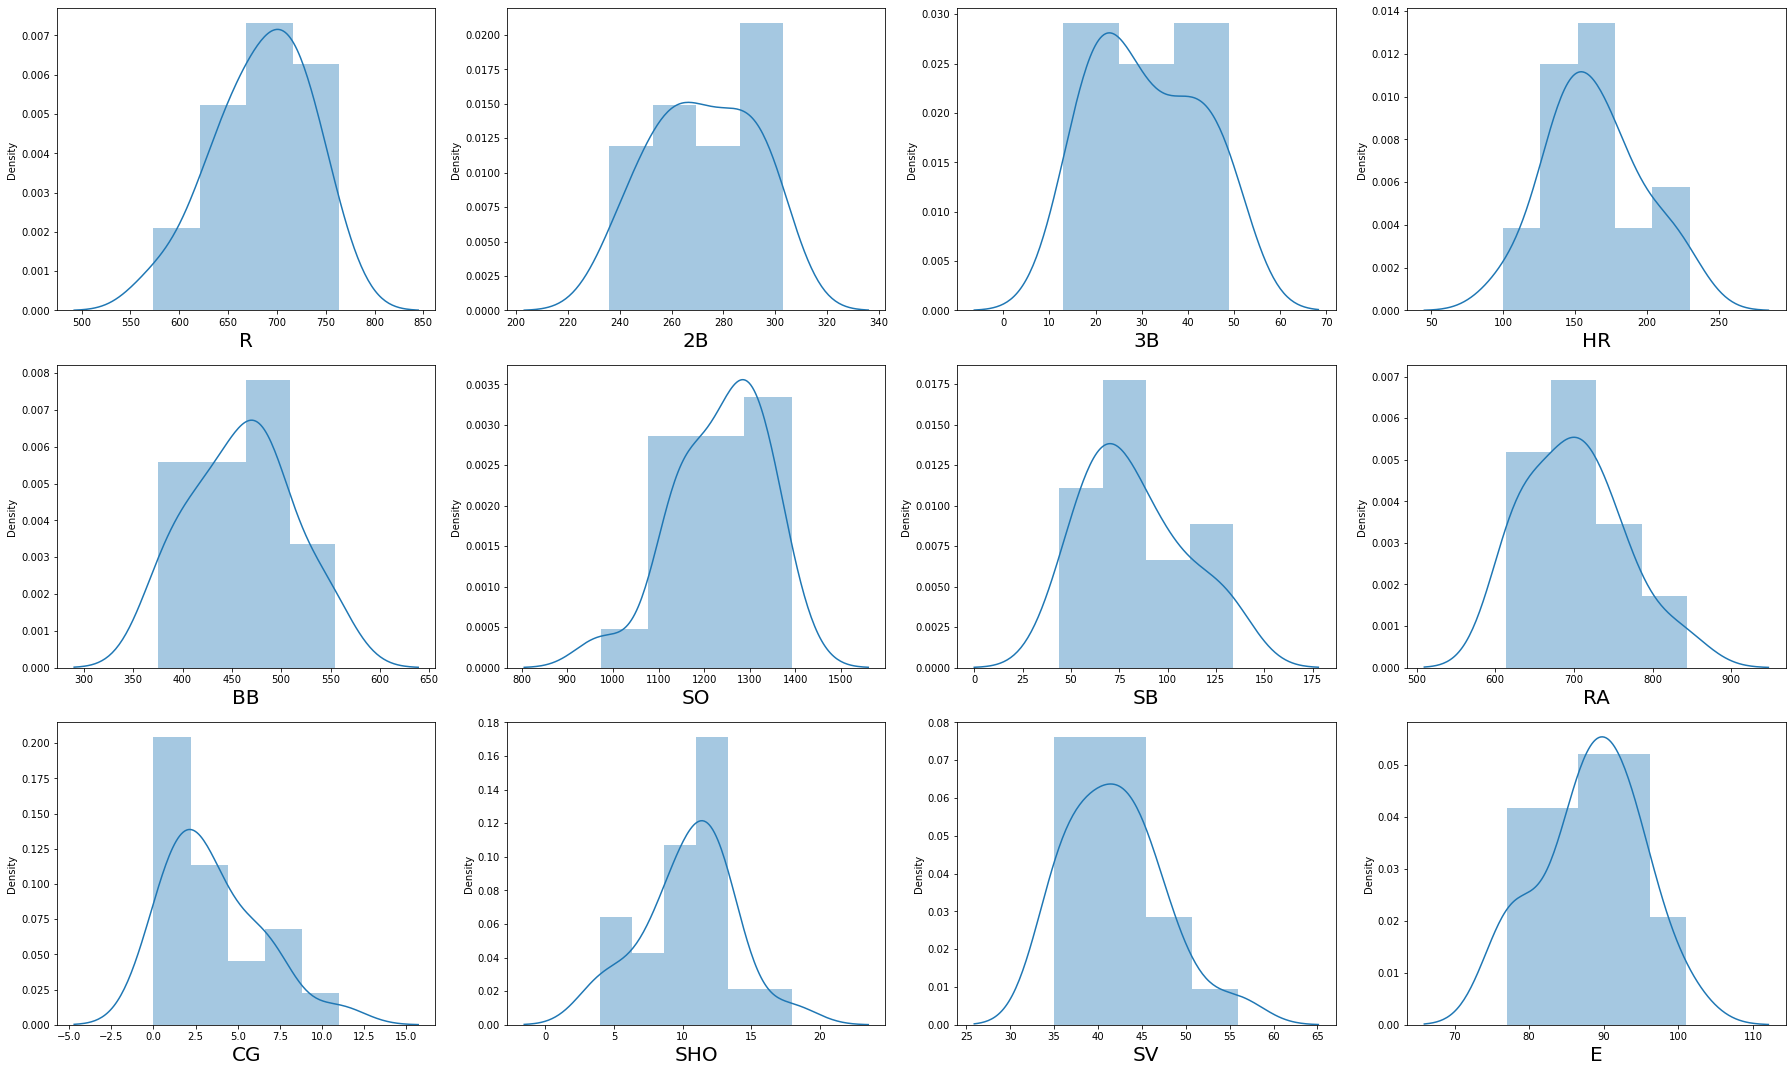

In [42]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 12:
        ax = plt.subplot(3,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

There is a skewness present in the data hence using PowerTransformer to remove it

In [43]:
df.skew()

W     -0.097138
R     -0.501373
2B    -0.118255
3B     0.221282
HR     0.271368
BB     0.057364
SO    -0.783992
SB     0.572671
RA     0.546015
CG     1.004413
SHO   -0.195186
SV     0.772479
E     -0.243990
dtype: float64

In [44]:
scaler = PowerTransformer(method='yeo-johnson')

In [45]:
df[['SO','CG','SV']] = scaler.fit_transform(df[['SO','CG','SV']].values)

In [46]:
x = df.drop(['W'],axis=1)
y = df['W']

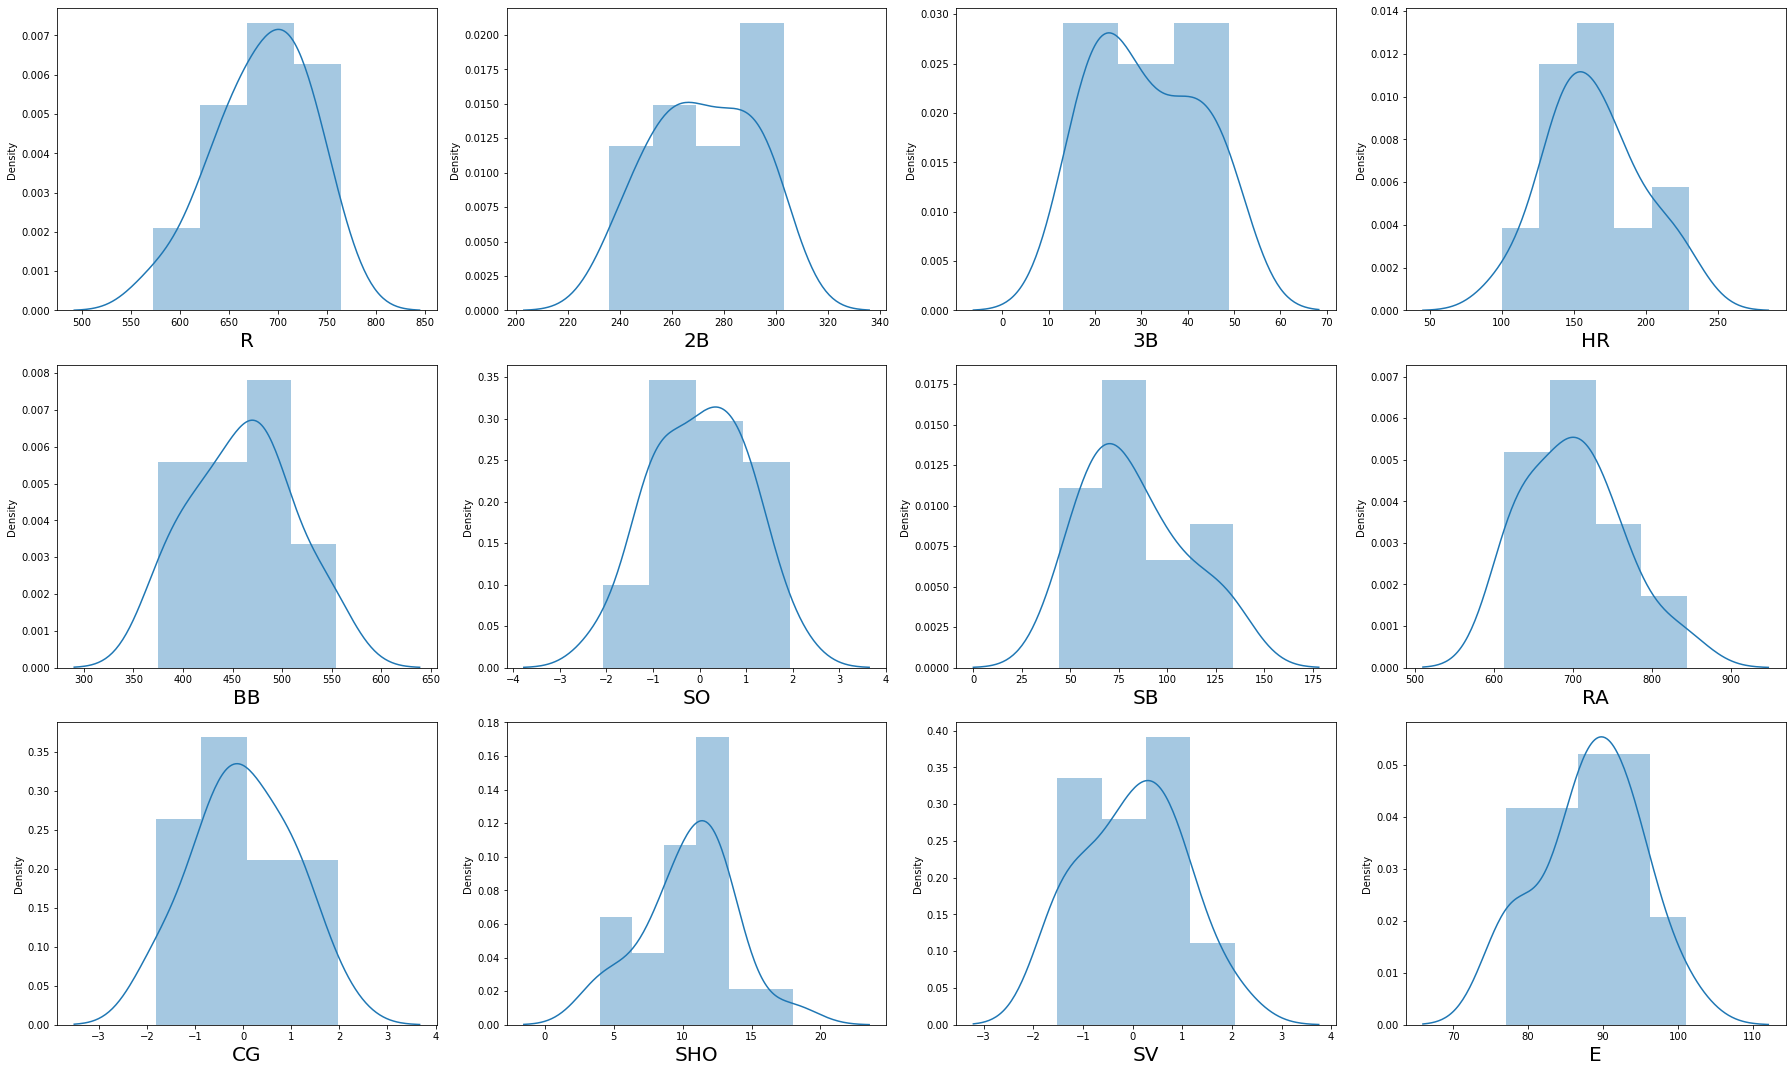

In [47]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 12:
        ax = plt.subplot(3,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Removed skewness from the data

In [48]:
x = df.drop(['W'],axis=1)
y = df['W']

In [49]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)

Scaling the data

# LinearRegression

In [50]:
reg = LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    reg.fit(x_train, y_train)
    x_pred = reg.predict(x_train)
    y_pred = reg.predict(x_test)
    print("At Random state", (i), "the training accuracy is :-", (r2_score (y_train,x_pred)))
    print("At Random state", (i), "the testing accuracy is :-", (r2_score (y_test,y_pred)))
    print('\n')

At Random state 0 the training accuracy is :- 0.9891006842565797
At Random state 0 the testing accuracy is :- 0.6096542024893234


At Random state 1 the training accuracy is :- 0.9926877060986744
At Random state 1 the testing accuracy is :- -2.6477175883980117


At Random state 2 the training accuracy is :- 0.9994526374730979
At Random state 2 the testing accuracy is :- 0.6815405967655744


At Random state 3 the training accuracy is :- 0.9988319169121108
At Random state 3 the testing accuracy is :- -0.0764107378776353


At Random state 4 the training accuracy is :- 0.9827656867160628
At Random state 4 the testing accuracy is :- -1.2333536260753433


At Random state 5 the training accuracy is :- 0.9839984675104203
At Random state 5 the testing accuracy is :- -1.9174749758324174


At Random state 6 the training accuracy is :- 0.9835073566169101
At Random state 6 the testing accuracy is :- -0.8609191622613113


At Random state 7 the training accuracy is :- 0.9993536062405766
At Random sta

In [51]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 26)

In [52]:
def print_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        print(f'Accuracy Score: {r2_score (y_train,y_pred)*100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n===============Test Result===============')
        print(f'Accuracy Score: {r2_score (y_test,pred)*100:.2f}%') 
        
        print ('\n mean_absolute_error',mean_absolute_error(y_test,pred))
        print ('\n mean_squared_error',mean_squared_error (y_test,pred))
         

In [53]:
reg = LinearRegression()
reg.fit(x_train,y_train)

print_score(reg,x_train,x_test,y_train,y_test, train=True)
print_score(reg,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 95.82%

===============Test Result===============
Accuracy Score: 95.60%

 mean_absolute_error 1.6121137661564973

 mean_squared_error 4.08407336627937


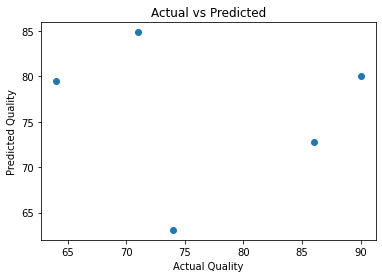

In [54]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted')
plt.show()

In [55]:
Lassocv = LassoCV(alphas = np.arange(0.001,0.1,0.01), max_iter = 100, normalize = True)
Lassocv.fit(x_train, y_train)
alpha = Lassocv.alpha_
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)
prediction = lasso_reg.predict(x_test)
r2_score(y_test, prediction)

0.9530078394538265

In [56]:
rdgcv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)
rdgcv.fit(x_train, y_train)
alpha = rdgcv.alpha_
rd_model = Ridge(alpha)
rd_model.fit(x_train, y_train)
prediction = rd_model.predict(x_test)
r2_score(y_test, prediction)

0.9630916194382835

# Support Vector Regression

In [57]:
svr = SVR()
svr.fit(x_train,y_train)

print_score(svr,x_train,x_test,y_train,y_test, train=True)
print_score(svr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 21.02%

===============Test Result===============
Accuracy Score: -0.49%

 mean_absolute_error 8.967578487290984

 mean_squared_error 93.2570035595157


# DecisionTreeRegressor

In [58]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

print_score(dtr,x_train,x_test,y_train,y_test, train=True)
print_score(dtr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 100.00%

===============Test Result===============
Accuracy Score: -85.34%

 mean_absolute_error 10.4

 mean_squared_error 172.0


# AdaBoostRegressor

In [59]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

print_score(ada,x_train,x_test,y_train,y_test, train=True)
print_score(ada,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 99.18%

===============Test Result===============
Accuracy Score: 16.37%

 mean_absolute_error 7.7142857142857135

 mean_squared_error 77.60816326530612


# GradientBoostingRegressor

In [60]:
gbdt = GradientBoostingRegressor()
gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test, train=True)
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 100.00%

===============Test Result===============
Accuracy Score: -10.93%

 mean_absolute_error 7.870775705927841

 mean_squared_error 102.94605170996972


# RandomForestRegressor

In [61]:
rfr = GradientBoostingRegressor()
rfr.fit(x_train,y_train)

print_score(rfr,x_train,x_test,y_train,y_test, train=True)
print_score(rfr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 100.00%

===============Test Result===============
Accuracy Score: -5.17%

 mean_absolute_error 7.7481068823807195

 mean_squared_error 97.59968890041232


# Findings

- LinearRegression train accuracy score 95.82% and test accuracy score 95.60%
- Support Vector Regression train accuracy score 21.02% and test accuracy score -0.49%
- DecisionTreeRegressor train accuracy score 100% and test accuracy score -85.34%
- AdaBoostRegressor train accuracy score 99.18% and test accuracy score 16.37%
- GradientBoostingRegressor train accuracy score 100% and test accuracy score -10.93%
- RandomForestRegressor train accuracy score 100% and test accuracy score -5.17%

# Conclusion 

##### Selecting LinearRegression since the Accuracy score and test scores are greater and clsoe to each other.

### Saving the Model 

In [62]:
file = 'Baseball_Case_Study.pickle'
pickle.dump(reg, open(file, 'wb'))